In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import simpson
from scipy.optimize import curve_fit

part 1: find $f_e$



In [2]:
df1 = pd.read_excel('lab1.xlsx',sheet_name='Sheet1')
df1

,f (Hz),A_rms (V),dA(V),G (output/input),delta G,|G|^2,delta |G|^2
0,10,0.294,0.005,103.944697,1,1.080450e+04,207.889394
1,20,0.298,0.005,105.358910,1,1.110050e+04,210.717821
2,40,0.374,0.010,132.228968,1,1.748450e+04,264.457936
3,70,4.515,0.010,1596.293559,1,2.548153e+06,3192.587117
4,100,7.765,0.005,2745.342078,1,7.536903e+06,5490.684156
5,200,17.150,0.010,6063.440649,1,3.676531e+07,12126.881297
6,400,27.100,0.005,9581.296885,1,9.180125e+07,19162.593770
7,700,32.250,0.010,11402.096847,1,1.300078e+08,22804.193693
8,1000,34.000,0.010,12020.815280,1,1.445000e+08,24041.630560
9,2000,35.100,0.010,12409.724010,1,1.540012e+08,24819.448020


In [3]:
f = df1['f (Hz)'].to_numpy(); ef=np.zeros(f.size)
input = 4e-3 # 4 mV
g2 = df1['|G|^2'].to_numpy(); eg2=df1['delta |G|^2'].to_numpy()
f.shape==g2.shape

True

Text(0, 0.5, '$|G|^2$')

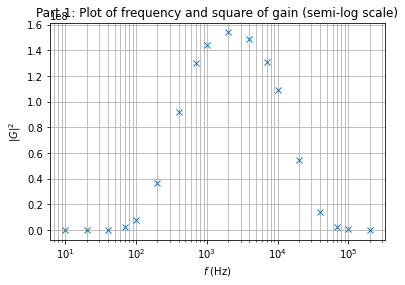

In [4]:
plt.figure(); plt.grid(True, which="both")
plt.semilogx(f, g2, 'x')
plt.title('Part 1: Plot of frequency and square of gain (semi-log scale)')
plt.xlabel('$f$ (Hz)'); plt.ylabel('$|G|^2$')

In [5]:
#effective bandwidth
f_ = simpson(g2,f)
f_/1e12 #1e12

2.902359145820434

part2: find $k_B$


In [6]:
df2 = pd.read_excel('lab1.xlsx',sheet_name='Sheet2')
df2

,R (ohm),min,max,v(noise),error,v,vp
0,47,122,124,123.0,1.0,0.0,1.00
1,100,122,124,123.0,1.0,1.0,0.50
2,220,122,124,123.0,1.0,1.0,0.50
3,470,122,123,122.5,0.5,0.5,1.00
4,1000,122,123,122.5,0.5,0.5,1.00
5,2200,123,124,123.5,1.0,2.0,1.00
6,4700,125,126,125.5,0.5,3.5,1.75
7,10000,129,131,130.0,1.0,8.0,4.00
8,22000,136,140,138.0,2.0,16.0,8.00
9,47000,149,155,152.0,3.0,30.0,15.00


In [7]:
r2 = df2['R (ohm)'].to_numpy(); er=np.zeros(r2.size)
v = df2['vp'].to_numpy(); ev=df2['error'].to_numpy()

#v = v - 122 * np.ones(v.size)
#v

C:\Users\Windows\AppData\Local\Temp\ipykernel_17836\548378133.py:2: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(a*x)+b


Text(0, 0.5, '$f$ (Hz)')

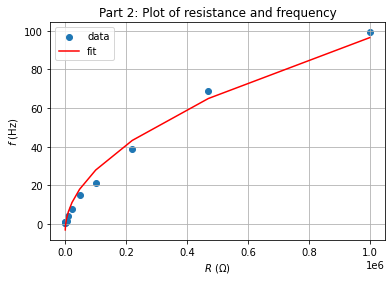

In [8]:
def fn(x,a,b):
    return np.sqrt(a*x)+b
popt, pcov = curve_fit(fn, r2, v)

vfit=fn(r2,*popt)
plt.grid(True, which='both')
plt.scatter(r2,v,label='data'); plt.plot(r2,vfit,color='r',label='fit')
plt.legend(loc='best')
plt.title('Part 2: Plot of resistance and frequency')
plt.xlabel('$R$ ($\Omega$)'); plt.ylabel('$f$ (Hz)')

In [9]:
import uncertainties as u

In [10]:
T = 24.9+273.15
T=u.ufloat(T,0.1); f_=u.ufloat(f_,1e10)
a=u.ufloat(popt[0],np.sqrt(6.66404339e-06))
kb = a/1000**2/(4*T*f_)

print(popt, pcov)

print(f'{kb:.1ue}')

[ 0.01004179 -3.75321989] [[ 4.49714435e-07 -5.02695981e-04]
 [-5.02695981e-04  1.50166355e+00]]
(2.9+/-0.7)e-24
